# Projeto 2 - Ciência dos Dados

### Alunos: 
        
#####       Letícia Coêlho Barbosa

#####        Matheus Silva Melo de Oliveira

___
## Índice

- [Contextualização](#context)

    - [Entendendo a Base de dados](#Base)


- [Bibliotecas](#bibliotecas)


- [Carregando base de dados](#carregando)


- [Vizualização de Dados categóricos](#visualizando)
    - [Portas mais relevantes segmentadas por ação tomada pelo Firewall](#porta)


- [Vizualização de Dados numéricos](#visualizando1)


## Contextualização

------------------------------------------------------------

<div id="context"></div>

Atualmente, navegar no meio cibernético tornou-se uma comunalidade, ficou mais fácil para os usuários navegarem, se comunicarem, compartilharem informações. Entretanto, essa nova realidade também trás ameaças. A disseminação de vírus, os ataques de hackers a todo tipo de máquina, seja pessoal ou corporativa, estão maiores do que nunca.

Para defender os nossos queridos celulares/tablets/computadores existem diversos programas e ferramentas que se propõem a defender o seu sistema, uma dessas técnicas utilizadas com esse objetivo é conhecida como Firewall.

De acordo com o tamanho da rede, a quantidade de dados produzidos pelos usuários na rede pode ser muito grande.
Dispositivos de firewall em uma rede podem permitir ou impedir tráfego de acordo com a política usada examinando o
dados. A configuração de firewalls é vital para a comunicaçãoredes funcionem de forma adequada e segura.Firewalls agem como controle portas para redes de computadores.

Entendendo a sua importância como "barreira" para o fluxo de dados, o Firewall é o responsável pelo controle dos dados transferidos de e para o seu computador através da internet, além de prevenir que informações pessoais ou confidenciais sejam transmitidas pelo seu computador para a internet e impedir a invasão da máquina por software malicioso.

Portanto, o objetivo desse projeto é classificar e tentar prever, atraves das características da transação (Portas destino e cliente , Número de bytes total, entre outros), se determinada transação de dados será aceita ou negada/impedida pelo computador.

<br>
<center><img src="firewall_assets/firewall.gif" width=500 style="float: center; margin: 0px 0px 10px 10px"></center>

### Entendendo a base de dados utilizada
<div id="Base"></div>

* `Source Port`: Client Source Port - Geralmente apenas um arquivo executável que foi modificado a partir do código de fonte do programa original e substitui o executável original, para que possa ser rodado em uma outra plataforma para a qual não foi originalmente escrito


* `Destination Port`: Destination Port Client Destination Port - Para protocolos de aplicativos bem definidos, foram definidas portas bem conhecidas.  Os serviços só podem ser escutados em portas específicas.

A lista de portas conhecidas é mantida pela IANA(Acesse para saber mais: https://www.iana.org/assignments/service-names-port-numbers/service-names-port-numbers.xhtml)


* `NAT Source Port`: Porta de origem de tradução de endereço de rede. 


* `NAT Destination Port`: Porta de destino de tradução de endereço de rede.

     Em redes de computadores, Network Address Translation (NAT),  é uma técnica que consiste em reescrever, utilizando-se de uma tabela hash, os endereços IP de origem de um pacote que passam por um router (ou firewall) de maneira que um computador de uma rede interna tenha acesso a Rede Mundial de Computadores.
     
<br>
<center><img src="firewall_assets/Network_Address_Translation_(NAT).png" width=700 style="float: center; margin: 0px 0px 10px 10px"></center>
     

* `Bytes`: Número total de de Bytes da transação/pedido. 


* `Bytes Sent`: Número total de de Bytes enviados da transação/pedido.


* `Bytes Received`: Número total de de Bytes erecebidos da transação/pedido.


* `Packets`: Número total de pacotes. Pacotes são uma estrutura unitária de transmissão de dados ou uma sequência de dados transmitida por uma rede ou linha de comunicação que utilize a comutação de pacotes. A informação a transmitir  é quebrada em inúmeros pacotes e então transmitida. Além da parte da informação, o pacote possui um cabeçalho, que contém informações importantes para a transmissão, como o endereço do destinatário.

* `Elapsed Time (sec)`: Tempo decorrido para a transação/fluxo


* `pkts_sent`: Pacotes Enviados.


* `pkts_received`: Pacotes Recebidos.


* `Action`:  `Allow` (permite o  tráfego da Internet), `Deny` (Bloqueia o tráfego e impõe a ação negar de forma padrão para

     o aplicativo que está sendo negado), `Drop` (Silenciosamente diminui o tráfego. A TCP reset não é enviada para o host 
     
     ou para a aplicação), `Reset-Both` (Envia uma redefinição de TCP para os dispositivos do lado do cliente e do lado do 
     
     servidor.) 
     
<br>
<center><img src="firewall_assets/fire_packet.gif" width=400 style="float: center; margin: 0px 0px 10px 10px"></center>
<br>

Alguns termos importantes para a melhor compreensão do tema:

`TCP` (Transmission Control Protocol) e `IP` (Internet Protocol):  é um conjunto de protocolos de comunicação. Ele tem por objetivo padronizar todas as comunicações de rede, principalmente as comunicações na web.


`Portas`: portas lógicas para garantir que a aplicação (software) que iniciou a conversação encontrará no seu destino a aplicação desejada. São canais virtuais aleatórios que se abrem conforme o tipo de aplicação executando, como por exemplo, o HTTP utiliza a porta 80. Elas evitam que a informação seja direcionada erroneamente para outra aplicação.

## Bibliotecas

------------------------------------------------------------

<div id="bibliotecas"></div>

In [1]:
import numpy as np
import pandas as pd
import time
from scipy import stats 
# plots
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

## Carregando Base de Dados

---------------------------------------------------------------

<div id="carregando"></div>

In [2]:
filename = 'firewall_assets/log2.csv'
dados=pd.read_csv(filename)
dados.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


## Visualização de dados categóricos
------------------------------------------------------------

<div id="visualizando"></div>

In [16]:
# Funções utilizadas para a melhor plotagem e vizualização de valores:

def filtra_linha (coluna,n):
    
    '''Verifica se a linha contém uma das portas mais importantes no value_counts,
    filtrando assim esta para a plotagem do gráfico de colunas'''
    
    lista1 = list(dados[coluna].value_counts().index[0:n])
    lista2 = [i for i in range(dados.shape[0]) if dados[coluna][i] in lista1]
    
    return dados.iloc[lista2]

In [3]:
# Mostrando colunas
dados.columns

Index(['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Action', 'Bytes', 'Bytes Sent',
       'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent',
       'pkts_received'],
      dtype='object')

In [41]:
dados['Source Port'].value_counts()[:20]

58638    840
27005    513
443      273
57470    222
49418    210
6881     177
0        173
50584    116
3478     105
26900    102
5588      87
42298     84
48817     82
45941     77
50265     75
16387     73
37965     72
45964     68
1024      67
6666      53
Name: Source Port, dtype: int64

In [5]:
categoricos = dados.iloc[:,:4]
alvo = dados.iloc[:,4]
numericos = dados.iloc[:,5:]

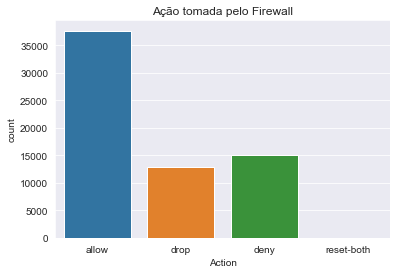

In [6]:
# Setando cores de fundo - gráficos
sns.set_style(style="darkgrid")

sns.countplot(dados.Action)
plt.title('Ação tomada pelo Firewall')
plt.show()

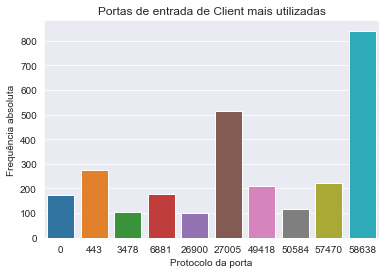

In [10]:
sns.countplot(filtra_linha('Source Port' , 10)['Source Port'])
plt.title('Portas de entrada de Client mais utilizadas')
plt.ylabel('Frequência absoluta')
plt.xlabel('Protocolo da porta')
plt.show()

#### Como vê-se no gráfico acima, as portas de entrada ou 'fonte' mais utilizadas no dataset, em geral são localizadas entre as portas 1024-65535, que são conhecidas como portas em geral regidas ou por organizações que possuem domínio web ou portas por clientes programacionais como browsers. Isso reforça o fato, de que a maioria das ações analisadas de um firewall ocorrem sobretudo em ações mais pessoais do que as regidas por processos protocolares do próprio computador.

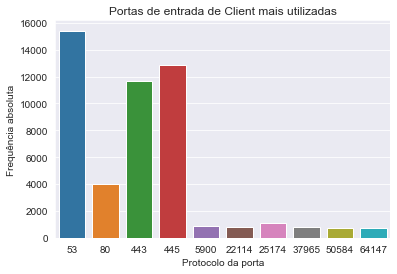

In [15]:
sns.countplot(filtra_linha('Destination Port', 10)['Destination Port'])
plt.title('Portas de entrada de Client mais utilizadas')
plt.ylabel('Frequência absoluta')
plt.xlabel('Protocolo da porta')
plt.show()

In [9]:
dados['Destination Port'].value_counts()[0:20]

53       15414
445      12891
443      11684
80        4035
25174     1087
5900       909
37965      826
22114      767
64147      756
50584      717
57470      671
44847      626
35440      428
51505      375
26467      371
23         363
56205      288
30188      265
6881       239
27015      236
Name: Destination Port, dtype: int64

*Por outro lado, nas portas de destinação mais analisadas por Firewalls, as portas com números localizados entre 0-1024, também se mostram com grande aparição, mostrando que nesse escopo, as ações analisadas não se restringem somente as ações executadas pelo usuário, mas também ações protocolores de softwares internos.*

### Portas mais relevantes segmentadas por ação tomada pelo Firewall

<div id="porta"></div>

***Após, análise da distribuição dos valores categóricos do dataset, isto é, as portas de orientação da máquina e de servidor, analisa-se a seguir a maneira como as portas mais utilizadas se comportam em relação as ações tomada pelo Firewall, e dessa forma pode-se concluir alguns padrões elucidados nessas ações em relação as portas mais utilizadas em cada um dos protocolos***.

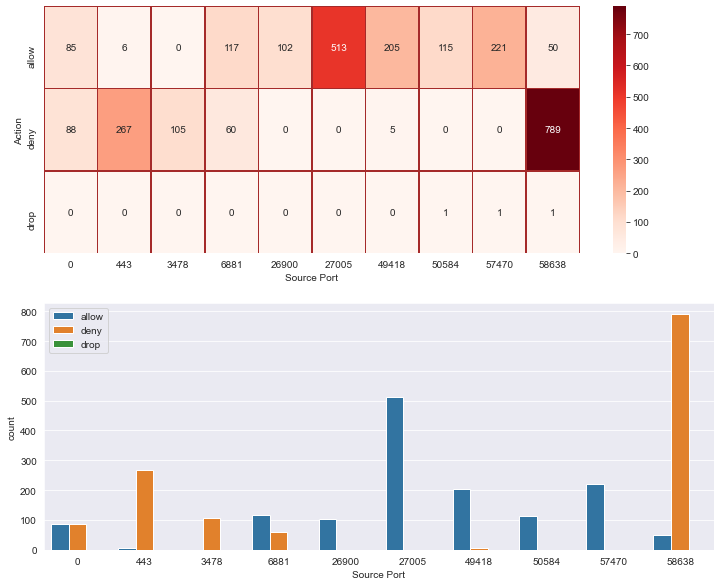

In [99]:
melhores_analise = dados[dados['Source Port'].isin(dados['Source Port']
                                          .value_counts()[0:10].index.to_list())]
cmp = pd.crosstab(melhores_analise.Action, melhores_analise['Source Port'])
plt.figure(figsize=(12,10))

plt.subplot(211)
sns.heatmap(cmp, annot=True, fmt='d', 
            cmap='Reds',
            linecolor='brown',
            linewidths=0.5)

plt.subplot(212)
data_SourcePort = filtra_linha('Source Port' , 10)
sns.countplot(data_SourcePort['Source Port'], hue = data_SourcePort['Action']);
plt.legend(loc='upper left')

plt.show()

#### Analisando o crosstab, observamos que a Source Port 27005 e 58638 apresentam , em sua maioria, ações mais imediatas de permissão e negação respectivamente.

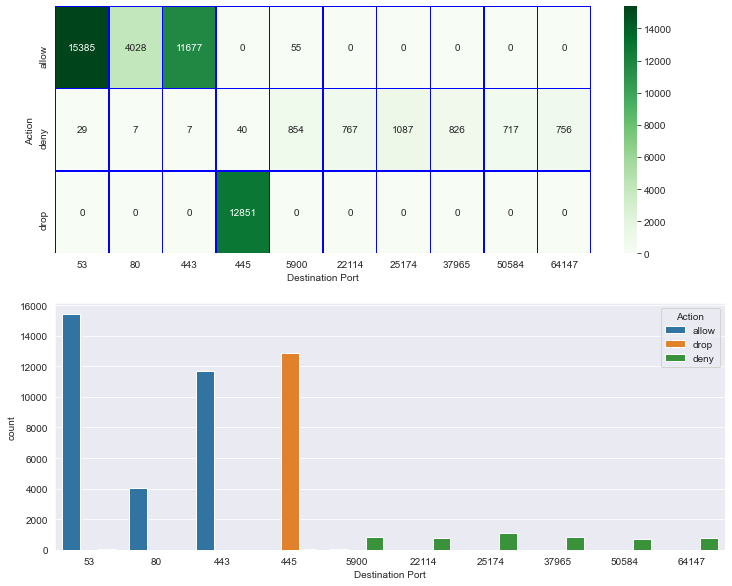

In [95]:
melhores_analise = dados[dados['Destination Port'].isin(dados['Destination Port']
                                          .value_counts()[0:10].index.to_list())]
cmp = pd.crosstab(melhores_analise.Action, melhores_analise['Destination Port'])
plt.figure(figsize=(12,10))

plt.subplot(211)
sns.heatmap(cmp, annot=True, fmt='d', 
            cmap='Greens',
            linecolor='blue',
            linewidths=0.5)

plt.subplot(212)
data_SourcePort = filtra_linha('Destination Port' , 10)
sns.countplot(data_SourcePort['Destination Port'], hue = data_SourcePort['Action']);

plt.show()

#### Analisando o crosstab, observamos que a Destination Port 53, 80, 443 e 445, possuem ações imediatas onde as 3 primeiras são majoritariamente aceitas e a última comumentemente negada.

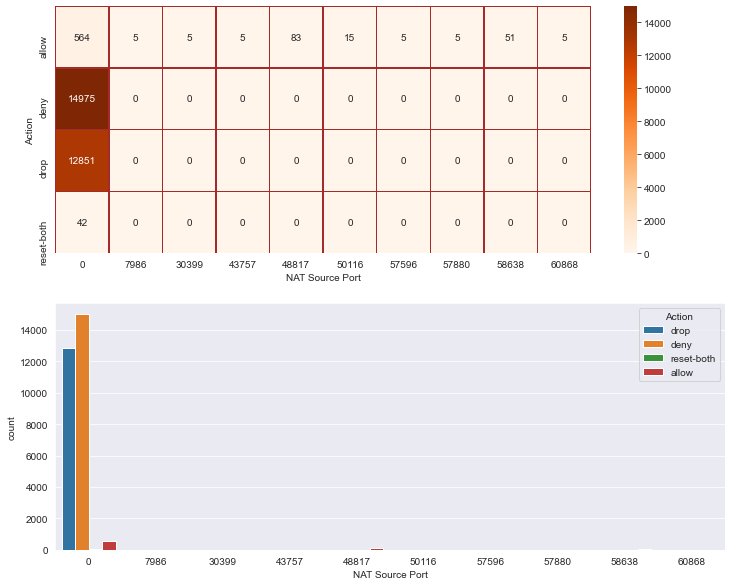

In [96]:
melhores_analise = dados[dados['NAT Source Port'].isin(dados['NAT Source Port']
                                          .value_counts()[0:10].index.to_list())]
cmp = pd.crosstab(melhores_analise.Action, melhores_analise['NAT Source Port'])
plt.figure(figsize=(12,10))
plt.subplot(211)
sns.heatmap(cmp, annot=True, fmt='d', 
            cmap='Oranges',
            linecolor='brown',
            linewidths=0.5)

plt.subplot(212)
data_SourcePort = filtra_linha('NAT Source Port' , 10)
sns.countplot(data_SourcePort['NAT Source Port'], hue = data_SourcePort['Action']);

plt.show()

#### Analisando o crosstab, observamos que a NAT Source Port 0, possuem ações que se dividem majoritariamente entre deny e drop, possuindo poucas ações permitdas.

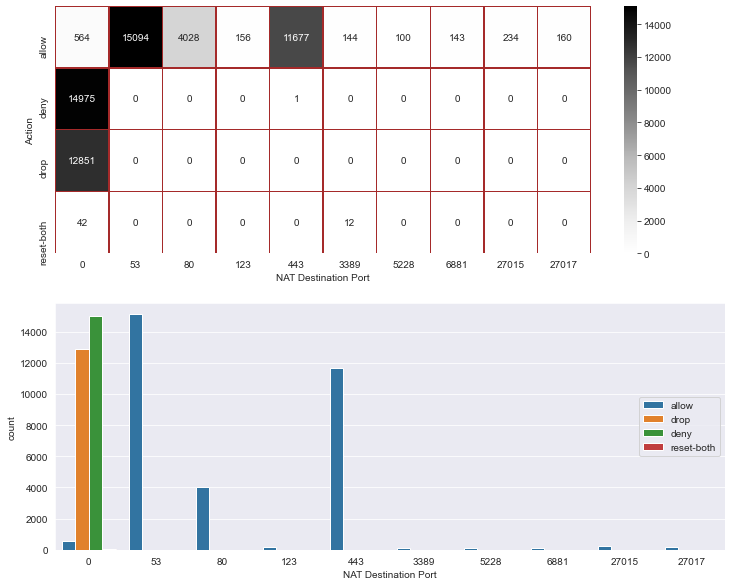

In [97]:
melhores_analise = dados[dados['NAT Destination Port'].isin(dados['NAT Destination Port']
                                          .value_counts()[0:10].index.to_list())]
cmp = pd.crosstab(melhores_analise.Action, melhores_analise['NAT Destination Port'])
plt.figure(figsize=(12,10))

plt.subplot(211)
sns.heatmap(cmp, annot=True, fmt='d', 
            cmap='Greys',
            linecolor='brown',
            linewidths=0.5)

plt.subplot(212)
data_SourcePort = filtra_linha('NAT Destination Port' , 10)
sns.countplot(data_SourcePort['NAT Destination Port'], hue = data_SourcePort['Action']);
plt.legend(loc='right')

plt.show()

#### Analisando o crosstab, observamos que a NAT Destination Port 0, há divisão de ação entre drop e deny , Port 53, 80 e 443 possuem ação majoritariamente allow.

## Visualização dos conjuntos de dados numéricos

<div id="visualizando1"></div>

*Vamos agora analisar como os conjuntos de dados numéricos, respectivos a quantidade de Bytes, Packets e tempo na análise dos fluxos de dados, e assim aplicar os parâmetros mais adequados para sua visualização e entendimento*

In [30]:
dados.Bytes.describe()

count    6.553200e+04
mean     9.712395e+04
std      5.618439e+06
min      6.000000e+01
25%      6.600000e+01
50%      1.680000e+02
75%      7.522500e+02
max      1.269359e+09
Name: Bytes, dtype: float64

In [31]:
dados.Packets.describe()

count    6.553200e+04
mean     1.028660e+02
std      5.133002e+03
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      6.000000e+00
max      1.036116e+06
Name: Packets, dtype: float64

In [32]:
dados['Elapsed Time (sec)'].describe()

count    65532.000000
mean        65.833577
std        302.461762
min          0.000000
25%          0.000000
50%         15.000000
75%         30.000000
max      10824.000000
Name: Elapsed Time (sec), dtype: float64

*Como vemos, a conjuntura desses valores tem valores muito grandes e valores diminutos, o que possivelmente dificultará sua visualização em gráficos, e por consequência, dificultará a visualização gráfica e estatística do conjunto de dados. Para contornar esse problema, adota-se uma condição de normalização dos dados em escala logarítimica, para assim, valores grandes e pequenos, tenham representações relativamente proporcionais nos gráficos plotados*

In [18]:
normalizing = lambda x: np.log10(1+x)

#### A função 'normalizing' foi criada para facilitar a vizualização da plotagem dos dados, vistos que os valores das colunas Bytes e Packets possuem grandes variações. Dessa forma a representação desses dados na base 10, possibilitará melhor analise da distribuição.

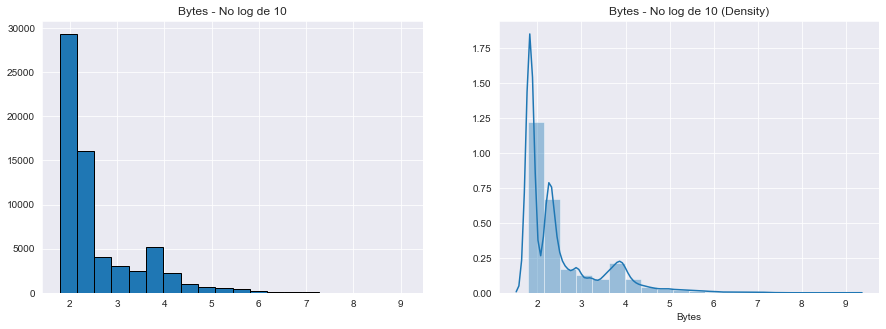

In [40]:
plt.figure(figsize = (15,5))

plt.subplot(121)
plt.hist(normalizing(dados['Bytes']), bins=20,edgecolor='black')
plt.grid(True)
plt.title('Bytes' + ' - No log de 10')

plt.subplot(122)
sns.distplot(normalizing(dados['Bytes']), hist = True , bins=20)
plt.title('Bytes' + ' - No log de 10 (Density)')

plt.show()

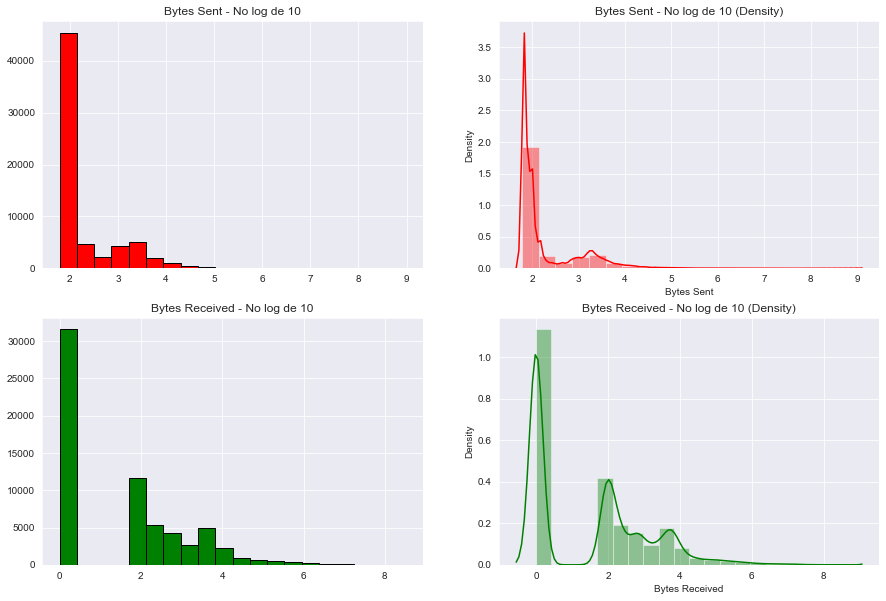

In [39]:
plt.figure(figsize=(15,10))

plt.subplot(221)
plt.hist(normalizing(dados['Bytes Sent']), bins=20,color='red',edgecolor='black')
plt.title('Bytes Sent' + ' - No log de 10')
plt.grid(True)

plt.subplot(222)
sns.distplot(normalizing(dados['Bytes Sent']), hist = True , bins=20, color = 'red')
plt.title('Bytes Sent' + ' - No log de 10 (Density)')
plt.ylabel('Density')

plt.subplot(223)
plt.hist(normalizing(dados['Bytes Received']), bins=20,color='green',edgecolor='black')
plt.title('Bytes Received' + ' - No log de 10')
plt.grid(True)

plt.subplot(224)
sns.distplot(normalizing(dados['Bytes Received']), hist = True , bins=20, color = 'green')
plt.title('Bytes Received' + ' - No log de 10 (Density)')
plt.ylabel('Density')

plt.show()

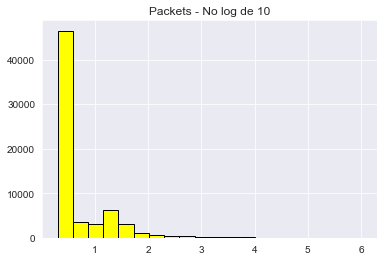

In [36]:
plt.hist(normalizing(dados['Packets']), bins=20,color='yellow',edgecolor='black')
plt.grid(True)
plt.title('Packets' + ' - No log de 10')
plt.show()

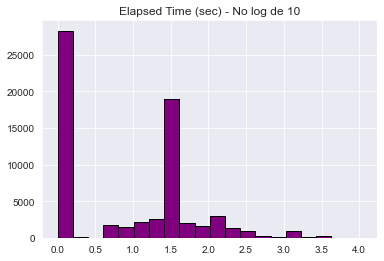

In [37]:
plt.hist(normalizing(dados['Elapsed Time (sec)']), bins=20,color='purple',edgecolor='black')
plt.grid(True)
plt.title('Elapsed Time (sec)' + ' - No log de 10')
plt.show()

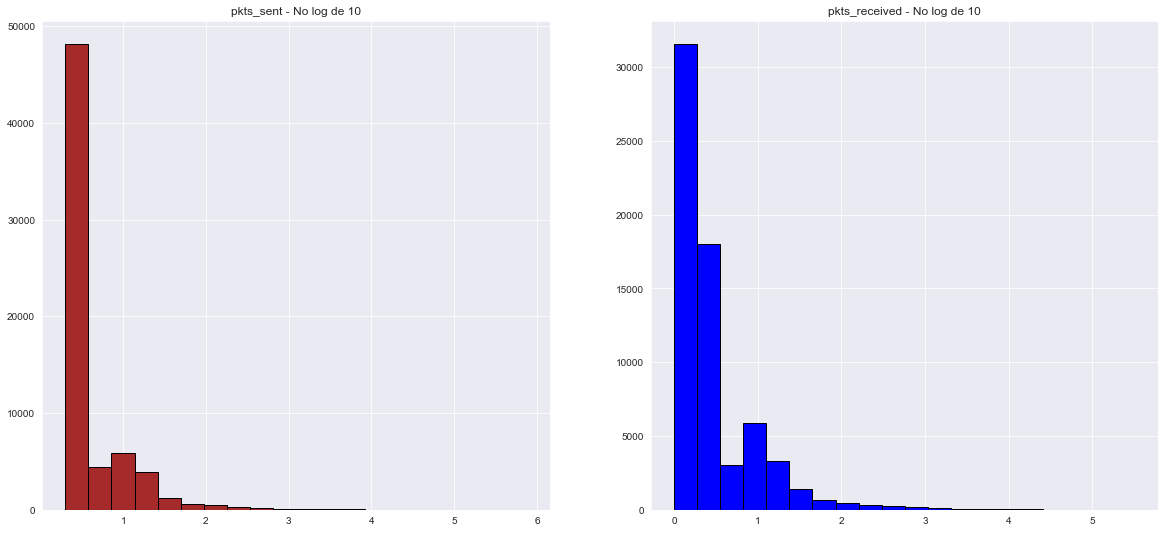

In [38]:
plt.figure(figsize=(20,9))
plt.subplot(121)
plt.hist(normalizing(dados['pkts_sent']), bins=20,color='brown',edgecolor='black')
plt.grid(True)
plt.title('pkts_sent' + ' - No log de 10')

plt.subplot(122)
plt.hist(normalizing(dados['pkts_received']), bins=20,color='blue',edgecolor='black')
plt.grid(True)
plt.title('pkts_received' + ' - No log de 10')

plt.show()

### Análise cruzada de dados numéricos

***Segmentou-se o conjunto de dados de acordo com a ação tomada pelo Firewall (allow,deny,drop e reset-both), e nisso realizou-se comparação por scatterplots, para analisar-se a correlação entre esses fatores, e assim analisar possíveis explicações por via gráfica e estatística que auxiliem na construção do modelo***.

In [51]:
allow = dados[dados.Action == 'allow']
deny =  dados[dados.Action == 'deny']
drop =  dados[dados.Action == 'drop']
reset_both =  dados[dados.Action == 'reset-both']

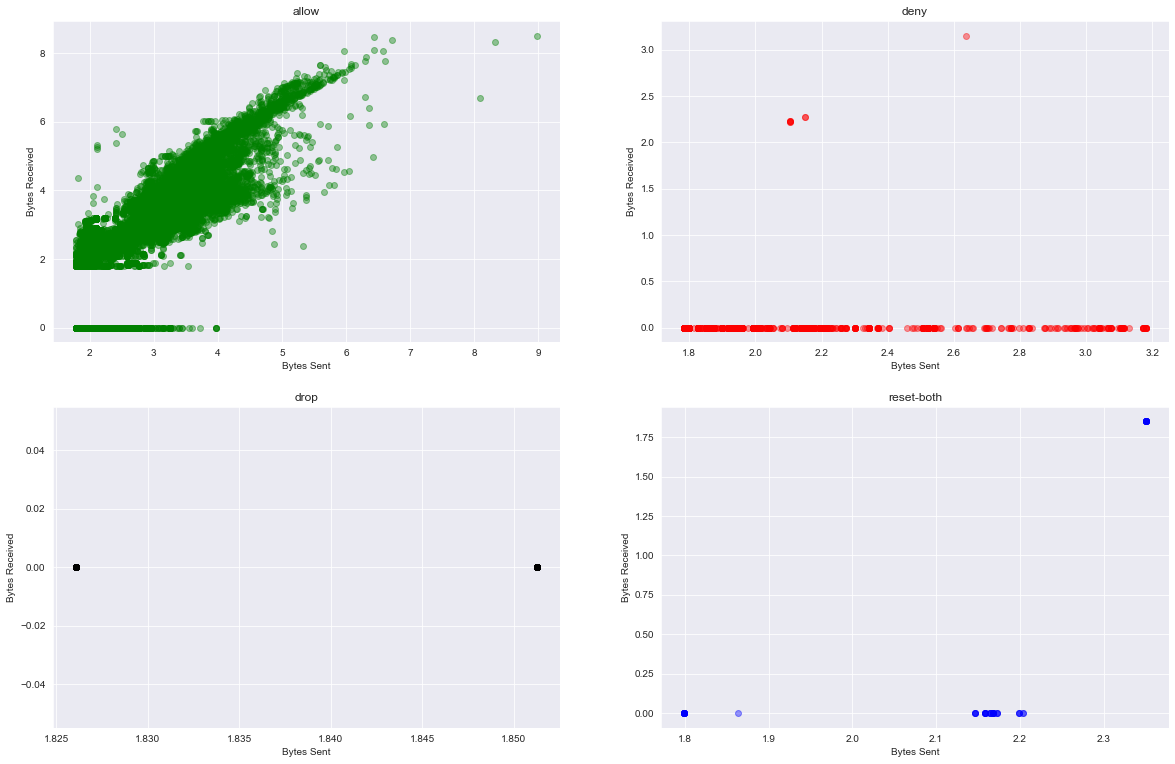

In [64]:
plt.figure(figsize=(20,13))
for data,number,name,color in ([allow,1,'allow','green'],[deny,2,'deny','red'],
                               [drop,3,'drop','black'],[reset_both,4,'reset-both','blue']):
    plt.subplot(2,2,number)                     
    plt.scatter(normalizing(data['Bytes Sent']),
                normalizing(data['Bytes Received']),alpha=0.4,color=color)
    plt.title(name)
    plt.xlabel('Bytes Sent')
    plt.ylabel('Bytes Received')
plt.show()                         

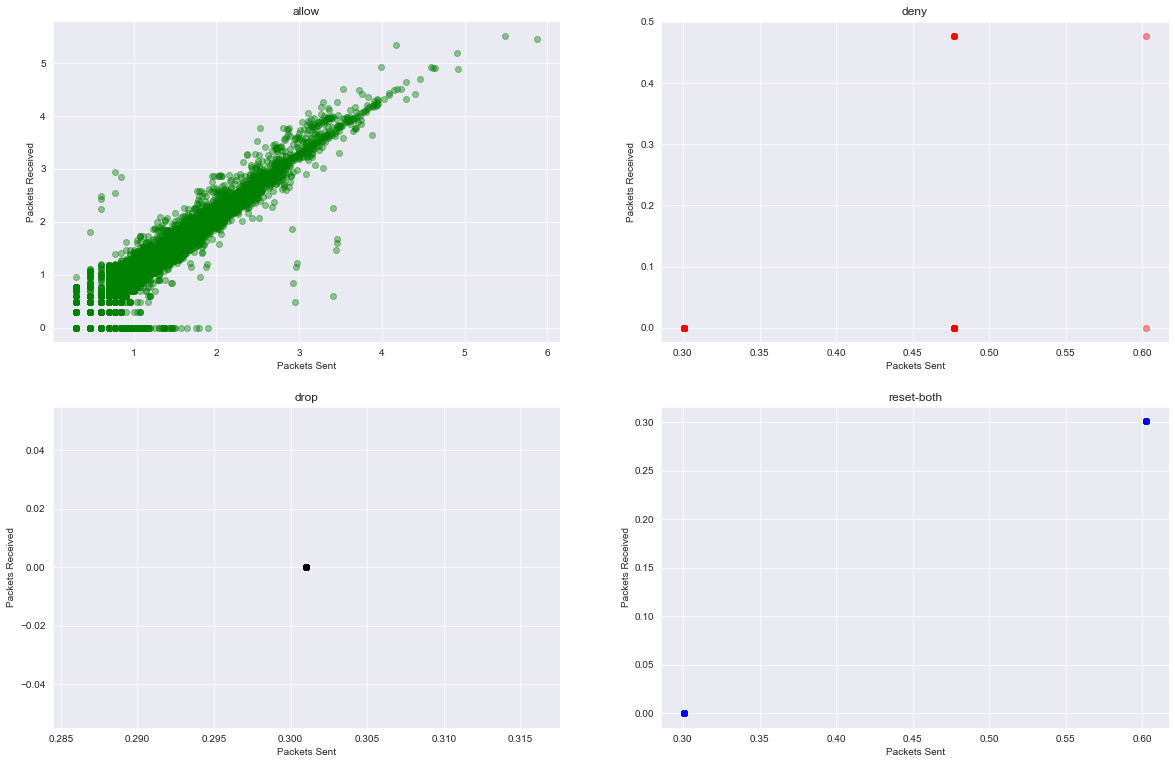

In [65]:
plt.figure(figsize=(20,13))
for data,number,name,color in ([allow,1,'allow','green'],[deny,2,'deny','red'],
                               [drop,3,'drop','black'],[reset_both,4,'reset-both','blue']):
    plt.subplot(2,2,number)                     
    plt.scatter(normalizing(data['pkts_sent']),
                normalizing(data['pkts_received']),alpha=0.4,color=color)
    plt.title(name)
    plt.xlabel('Packets Sent')
    plt.ylabel('Packets Received')
plt.show()      

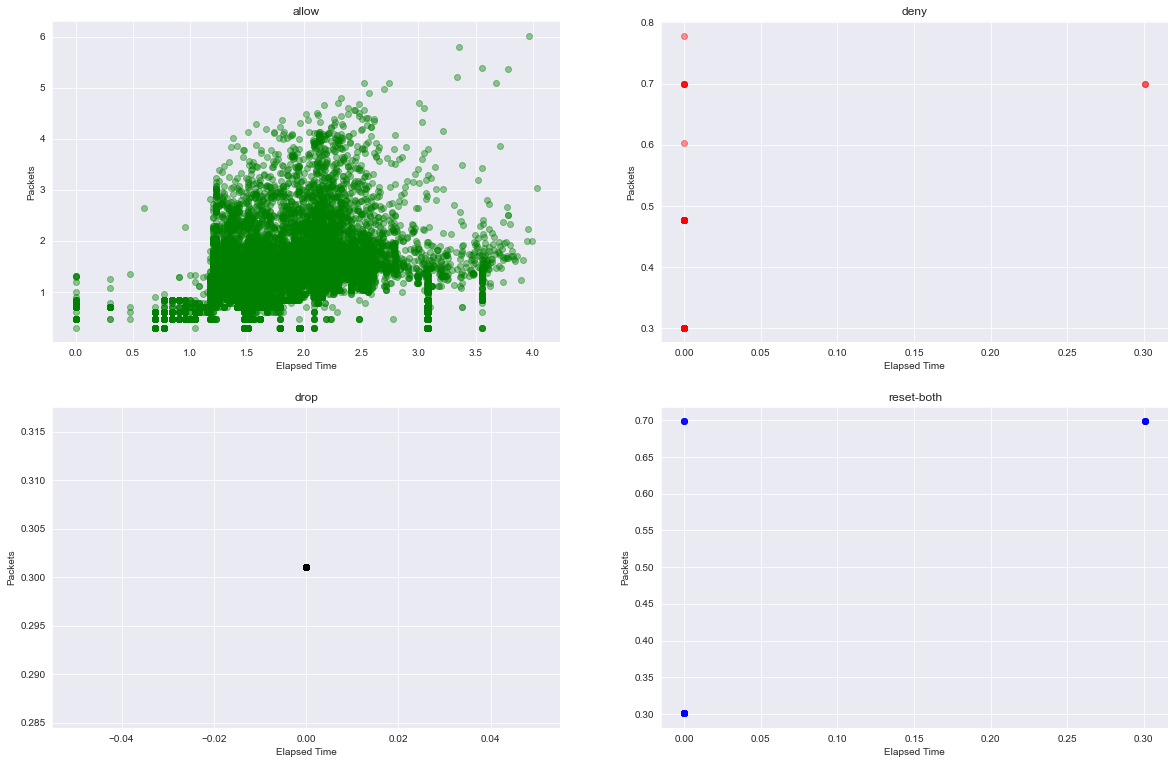

In [66]:
plt.figure(figsize=(20,13))
for data,number,name,color in ([allow,1,'allow','green'],[deny,2,'deny','red'],
                               [drop,3,'drop','black'],[reset_both,4,'reset-both','blue']):
    plt.subplot(2,2,number)                     
    plt.scatter(normalizing(data['Elapsed Time (sec)']),
                normalizing(data['Packets']),alpha=0.4,color=color)
    plt.title(name)
    plt.ylabel('Packets')
    plt.xlabel('Elapsed Time')
plt.show()      

## Construção do modelo 

### Vamos agora entender a importância dos features para o modelo, isto é a relevãncia de cada um dos atributos de acordo com sua relevância para a ação tomada pelo Firewall.

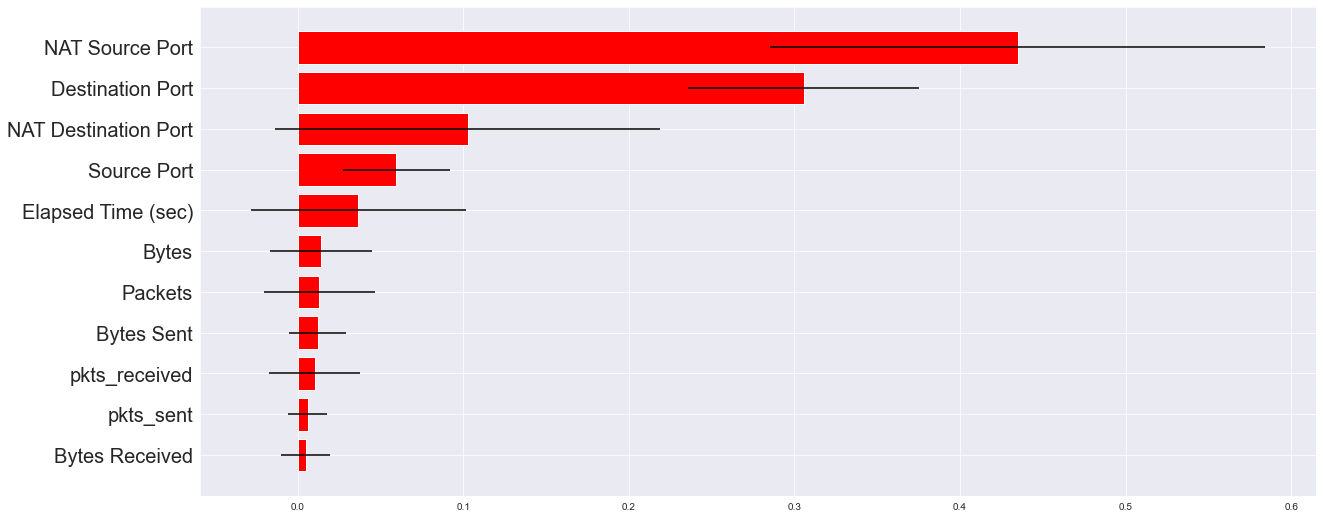

In [25]:
#Fazendo seleção dos atributos utilizados
features = dados.copy()
action = dados.Action
features = features.drop('Action',axis=1)
X, y = features,action


# Construindo uma floresta que estima a importância de cada atributo
floresta = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

#Treinando o semi modelo
floresta.fit(X, y)
importancias = floresta.feature_importances_
desvio = np.std([tree.feature_importances_ for tree in floresta.estimators_],
             axis=0)
indices = np.argsort(importancias)

#Traduzindo os indices numéricos para os nomes no dataset
index=[]
for i in indices:
    index.append(features.iloc[:,i].name)
    
# Plota o nível de importância de cada atributo para o modelo
plt.figure(figsize=(20,9))
plt.title("",size=25)
plt.barh(range(X.shape[1]), importancias[indices],
       color="r", xerr=desvio[indices], align="center")
plt.yticks(range(X.shape[1]),index,size=20)
plt.ylim([-1, X.shape[1]])
plt.show()


#### Link para refrenciar depois: https://pt.wikipedia.org/wiki/Source_port#:~:text=Source%20port%20%C3%A9%20a%20portabiliza%C3%A7%C3%A3o,qual%20n%C3%A3o%20foi%20originalmente%20escrito. 

https://www.pcmag.com/encyclopedia/term/tcpip-port#:~:text=Destination%20Ports%20Are%20Server%20Applications&text=For%20example%2C%20all%20port%2080,such%20as%20Skype%20and%20BitTorrent.

https://www.infonova.com.br/artigo/o-que-e-tcp-ip-e-como-funciona/#:~:text=O%20TCP%20%C3%A9%20um%20protocolo,sequ%C3%AAncia%20pelo%20qual%20foram%20enviados.

https://pt.wikipedia.org/wiki/Network_address_translation

https://pt.wikipedia.org/wiki/Pacote